In [1]:
#Simple example of transport properties of a coherent double quantum dot.  The counting statistics functions used here
#return the current, shot noise and noise spectrum (if required) for left and right junctions, and cross-correlations 
#between junctions

#For the current and zero frequency shot noise comparisons are made to known analytical results.
#I believe the frequency dependance is also analytical, but I cannot for the life of me find the formula in my thesis.


#Author: Neill Lambert

In [1]:


# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# make qutip available in the rest of the notebook
from qutip import *


In [3]:
#DDOT example, frequency dependance  

#number of data points:
data=500
wmax=2
#list of frequencies
w_vec = linspace(0., wmax,data)

#Parameters
eps = 0.5  # detuning
Tc  = 0.1  # tunnelling strength
GammaR=0.025
GammaL=0.025

Lstate = basis(3,0)
Rstate = basis(3,1)
Empty = basis(3,2)

H =  0.5*eps * (Lstate*Lstate.dag() - Rstate*Rstate.dag()) +Tc*(Lstate*Rstate.dag() + Rstate*Lstate.dag())

c_ops = []
rate=GammaL
if rate > 0.0:
    c_ops.append(sqrt(rate) * Lstate*Empty.dag())

rate=GammaR
if rate > 0.0:
    c_ops.append(sqrt(rate) * Empty*Rstate.dag())

In [4]:

rho_ss = steadystate(H, c_ops)
L = liouvillian(H, c_ops)
I,S=countstat_current_noise(L, [], wlist=w_vec,rhoss=rho_ss, 
            J_ops=[GammaR*sprepost(Empty*Rstate.dag(), Rstate*Empty.dag()), 
                   GammaL*sprepost(Lstate*Empty.dag(),Empty*Lstate.dag())],sparse=False)    
    

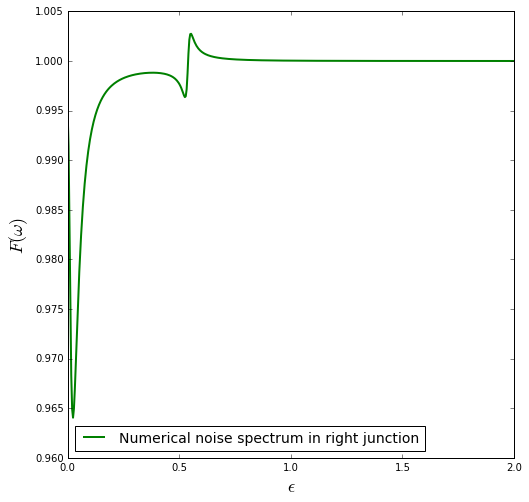

In [5]:
fig, axes = subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(w_vec, S[0,0,:]/I[0], 'g', linewidth=2, label="Numerical noise spectrum in right junction")

axes.legend(loc=0,prop={"size":14})
axes.set_xlabel(r'$\epsilon$', fontsize=18)
axes.set_ylabel(r'$F(\omega)$', fontsize=18)


In [6]:
#DDOT example, Detuning dependance  

#number of data points:
data=200
eps_max=1
#list of frequencies
eps_vec = linspace(-eps_max, eps_max,data)

#Parameters

Tc  = 0.1  # tunnelling strength
GammaR=0.0025
GammaL=0.1

Lstate = basis(3,0)
Rstate = basis(3,1)
Empty = basis(3,2)

c_ops = []
rate=GammaL
if rate > 0.0:
    c_ops.append(sqrt(rate) * Lstate*Empty.dag())

rate=GammaR
if rate > 0.0:
    c_ops.append(sqrt(rate) * Empty*Rstate.dag())

Num_of_J_ops=2

I_vec=[[] for N_ops in range(Num_of_J_ops)]
F_vec=[[[] for N_ops in range(Num_of_J_ops)] for N_ops in range(Num_of_J_ops)]

I_ana=[]
F_ana=[]

for eps in eps_vec:
       
    I_ana.append(4.*GammaR*GammaL*Tc**2/(4.*Tc**2*(2.*GammaL+GammaR)+GammaL*GammaR**2+4.*eps**2*GammaL)) #Analytical Current
    F_ana.append((1-8.*GammaL*Tc**2*(4*eps**2*(GammaR-GammaL) + GammaR*(3*GammaL*GammaR + GammaR**2 + 
                                        8*Tc**2))/(4.*Tc**2*(2.*GammaL+GammaR)+GammaL*GammaR**2+
                                        4.*eps**2*GammaL)**2)) #Analytical Zero frequency Fano factor (noise normalized by current)

    H =  0.5*eps * (Lstate*Lstate.dag() - Rstate*Rstate.dag()) +Tc*(Lstate*Rstate.dag() + Rstate*Lstate.dag())
    

    rho_ss = steadystate(H, c_ops)
    L = liouvillian(H, c_ops)
    I,S=countstat_current_noise(L, [],rhoss=rho_ss, 
                J_ops=[GammaR*sprepost(Empty*Rstate.dag(), Rstate*Empty.dag()), 
                       GammaL*sprepost(Lstate*Empty.dag(),Empty*Lstate.dag())],sparse=False)    
    for i in range(Num_of_J_ops):
        I_vec[i].append(I[i])
        for j in range(Num_of_J_ops):
            
            F_vec[i][j].append(S[i,j]/sqrt(I[i]*I[j]))


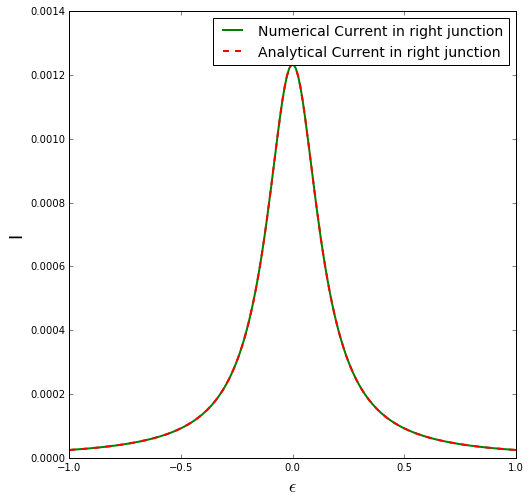

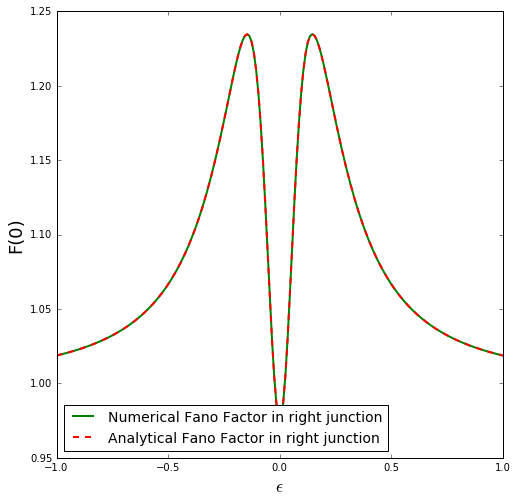

In [7]:

fig, axes = subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(eps_vec,I_vec[0], 'g', linewidth=2, label="Numerical Current in right junction")
axes.plot(eps_vec, I_ana, 'r--',  linewidth=2, label="Analytical Current in right junction")


axes.legend(loc=0,prop={"size":14})
axes.set_xlabel(r'$\epsilon$', fontsize=18)
axes.set_ylabel(r'I', fontsize=18)

fig1, axes1 = subplots(1, 1, sharex=True, figsize=(8,8))
axes1.plot(eps_vec, F_vec[0][0], 'g', linewidth=2, label="Numerical Fano Factor in right junction")
axes1.plot(eps_vec, F_ana, 'r--',  linewidth=2, label="Analytical Fano Factor in right junction")

axes1.legend(loc=0,prop={"size":14})
axes1.set_xlabel(r'$\epsilon$', fontsize=18)
axes1.set_ylabel(r'F(0)', fontsize=18)


In [8]:
#DDOT example, Detuning dependance,  example of sparse matrix failure

#number of data points:
data=200
eps_max=1
#list of frequencies
eps_vec = linspace(-eps_max, eps_max,data)

#Parameters

Tc  = 0.1  # tunnelling strength
GammaR=0.0025
GammaL=0.1

Lstate = basis(3,0)
Rstate = basis(3,1)
Empty = basis(3,2)

c_ops = []
rate=GammaL
if rate > 0.0:
    c_ops.append(sqrt(rate) * Lstate*Empty.dag())

rate=GammaR
if rate > 0.0:
    c_ops.append(sqrt(rate) * Empty*Rstate.dag())

Num_of_J_ops=2

I_vec=[[] for N_ops in range(Num_of_J_ops)]
F_vec=[[[] for N_ops in range(Num_of_J_ops)] for N_ops in range(Num_of_J_ops)]

I_ana=[]
F_ana=[]

for eps in eps_vec:
       
    I_ana.append(4.*GammaR*GammaL*Tc**2/(4.*Tc**2*(2.*GammaL+GammaR)+GammaL*GammaR**2+4.*eps**2*GammaL)) #Analytical Current
    F_ana.append((1-8.*GammaL*Tc**2*(4*eps**2*(GammaR-GammaL) + GammaR*(3*GammaL*GammaR + GammaR**2 + 
                                        8*Tc**2))/(4.*Tc**2*(2.*GammaL+GammaR)+GammaL*GammaR**2+
                                        4.*eps**2*GammaL)**2)) #Analytical Zero frequency Fano factor (noise normalized by current)

    H =  0.5*eps * (Lstate*Lstate.dag() - Rstate*Rstate.dag()) +Tc*(Lstate*Rstate.dag() + Rstate*Lstate.dag())
    

    rho_ss = steadystate(H, c_ops)
    L = liouvillian(H, c_ops)
    try:
        I,S=countstat_current_noise(L, [],rhoss=rho_ss, 
                    J_ops=[GammaR*sprepost(Empty*Rstate.dag(), Rstate*Empty.dag()), 
                           GammaL*sprepost(Lstate*Empty.dag(),Empty*Lstate.dag())],sparse=True,method="direct")    
    except:
        print "Failure of sparse solver, adding finite frequency dependance to remove the singular behavior."
        I,S=countstat_current_noise(L, [],wlist=[1e-6],rhoss=rho_ss, 
                    J_ops=[GammaR*sprepost(Empty*Rstate.dag(), Rstate*Empty.dag()), 
                           GammaL*sprepost(Lstate*Empty.dag(),Empty*Lstate.dag())],sparse=True,method="splu")    
        
    for i in range(Num_of_J_ops):
        I_vec[i].append(I[i])
        for j in range(Num_of_J_ops):
            
            F_vec[i][j].append(S[i,j]/sqrt(I[i]*I[j]))

Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance to remove the singular behavior.
Failure of sparse solver, adding finite frequency dependance

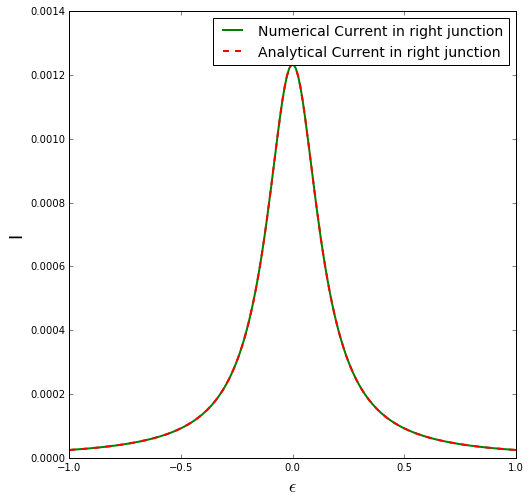

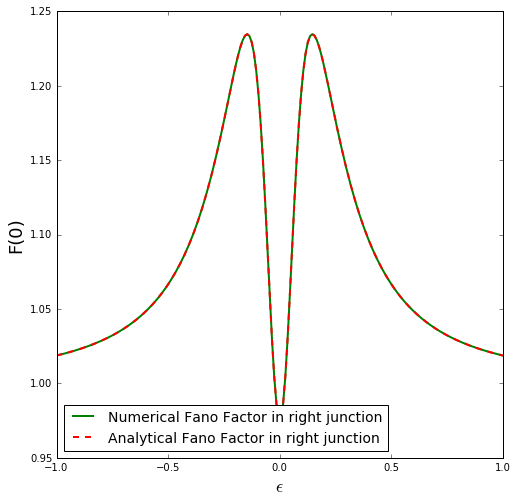

In [9]:

fig, axes = subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(eps_vec,I_vec[0], 'g', linewidth=2, label="Numerical Current in right junction")
axes.plot(eps_vec, I_ana, 'r--',  linewidth=2, label="Analytical Current in right junction")


axes.legend(loc=0,prop={"size":14})
axes.set_xlabel(r'$\epsilon$', fontsize=18)
axes.set_ylabel(r'I', fontsize=18)

fig1, axes1 = subplots(1, 1, sharex=True, figsize=(8,8))
axes1.plot(eps_vec, F_vec[0][0], 'g', linewidth=2, label="Numerical Fano Factor in right junction")
axes1.plot(eps_vec, F_ana, 'r--',  linewidth=2, label="Analytical Fano Factor in right junction")

axes1.legend(loc=0,prop={"size":14})
axes1.set_xlabel(r'$\epsilon$', fontsize=18)
axes1.set_ylabel(r'F(0)', fontsize=18)